In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




df = pd.read_csv("./HSI1995_2015.csv")


In [0]:
def trinum(n):

    return n*(n+1)/2

def wma(values, window):

    weights = np.arange(window, 0, -1.0)
    weights /= trinum(window)
     
    # created wma array with NaN values for indexes < window value
    weighted_moving_averages = np.empty(int(window-1) )
    weighted_moving_averages[:] = np.NAN
     
    # then append the wma's onto the end
    weighted_moving_averages = np.append(weighted_moving_averages, np.convolve(values, weights, 'valid'))
     
    return weighted_moving_averages

def hma(values, window):
     
    # requires wma.py
     
    # HMA = WMA(2*WMA(PRICE, N/2) - WMA(PRICE, N), SQRT(N))
    period = int(np.sqrt(window))
     
    wma1 = 2* wma(values, window/2)
    wma2 = wma(values, window)
     
    hull_moving_averages = wma( (wma1 - wma2) , period)
     
    return hull_moving_averages

def rsiFunc(prices, n=14):
    deltas = np.diff(prices)
    seed = deltas[:n+1]
    up = seed[seed>=0].sum()/n
    down = -seed[seed<0].sum()/n
    rs = up/down
    rsi = np.zeros_like(prices)
    rsi[:n] = 100. - 100./(1.+rs)
    rsi[:n] = 50

    for i in range(n, len(prices)):
        delta = deltas[i-1] # cause the diff is 1 shorter

        if delta>0:
            upval = delta
            downval = 0.
        else:
            upval = 0.
            downval = -delta

        up = (up*(n-1) + upval)/n
        down = (down*(n-1) + downval)/n

        rs = up/down
        rsi[i] = 100. - 100./(1.+rs)

    return rsi

def Bolinger_Bands(stock_price, window_size, num_of_std):

    rolling_mean = stock_price.rolling(window=window_size).mean()
    rolling_std  = stock_price.rolling(window=window_size).std()
    upper_band = rolling_mean + (rolling_std*num_of_std)
    lower_band = rolling_mean - (rolling_std*num_of_std)

    return rolling_mean, upper_band, lower_band

def Awesome_Osc(ohlc, slow_period=34, fast_period=5):


        slow = pd.Series(ohlc.rolling(window=slow_period).mean(), name='slow_AO')
        fast = pd.Series(ohlc.rolling(window=fast_period).mean(), name='fast_AO')

        return pd.Series(fast - slow, name='AO')

In [0]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1995-07-11,9712.900391,9732.099609,9639.400391,9670.000000,9670.000000,0.000000e+00
1,1995-07-12,9646.299805,9699.900391,9620.000000,9639.599609,9639.599609,0.000000e+00
2,1995-07-13,9701.700195,9820.799805,9701.700195,9742.400391,9742.400391,0.000000e+00
3,1995-07-14,9735.799805,9744.900391,9692.000000,9728.000000,9728.000000,0.000000e+00
4,1995-07-17,9686.799805,9686.799805,9598.200195,9634.000000,9634.000000,0.000000e+00
5,1995-07-18,9648.900391,9679.400391,9614.599609,9617.000000,9617.000000,0.000000e+00
6,1995-07-19,9537.000000,9537.000000,9370.099609,9418.900391,9418.900391,0.000000e+00
7,1995-07-20,9359.200195,9423.200195,9240.099609,9423.200195,9423.200195,0.000000e+00
8,1995-07-21,9432.799805,9439.099609,9374.099609,9410.200195,9410.200195,0.000000e+00
9,1995-07-24,9386.900391,9386.900391,9248.400391,9288.000000,9288.000000,0.000000e+00


In [0]:
the_row_to_del = [];
for i in range(0,len(df.index)):
    
    if(str(df[i:i+1].iat[0,1]) == "nan"):
        the_row_to_del.append(i)
        print("NaN!!",i)
    pass
df = df.drop(df.index[the_row_to_del])
df = df.reset_index().drop('index',1)

NaN!! 34
NaN!! 81
NaN!! 119
NaN!! 120
NaN!! 124
NaN!! 159
NaN!! 160
NaN!! 161
NaN!! 192
NaN!! 193
NaN!! 194
NaN!! 244
NaN!! 247
NaN!! 294
NaN!! 334
NaN!! 381
NaN!! 382
NaN!! 386
NaN!! 412
NaN!! 413
NaN!! 448
NaN!! 449
NaN!! 499
NaN!! 514
NaN!! 515
NaN!! 516
NaN!! 549
NaN!! 571
NaN!! 581
NaN!! 582
NaN!! 588
NaN!! 642
NaN!! 643
NaN!! 647
NaN!! 666
NaN!! 667
NaN!! 668
NaN!! 714
NaN!! 718
NaN!! 719
NaN!! 776
NaN!! 842
NaN!! 843
NaN!! 845
NaN!! 861
NaN!! 903
NaN!! 908
NaN!! 940
NaN!! 941
NaN!! 942
NaN!! 973
NaN!! 974
NaN!! 975
NaN!! 1028
NaN!! 1037
NaN!! 1092
NaN!! 1103
NaN!! 1114
NaN!! 1164
NaN!! 1168
NaN!! 1193
NaN!! 1194
NaN!! 1235
NaN!! 1248
NaN!! 1249
NaN!! 1254
NaN!! 1262
NaN!! 1280
NaN!! 1351
NaN!! 1364
NaN!! 1368
NaN!! 1424
NaN!! 1425
NaN!! 1429
NaN!! 1446
NaN!! 1447
NaN!! 1448
NaN!! 1497
NaN!! 1503
NaN!! 1504
NaN!! 1514
NaN!! 1515
NaN!! 1554
NaN!! 1559
NaN!! 1563
NaN!! 1576
NaN!! 1624
NaN!! 1625
NaN!! 1685
NaN!! 1686
NaN!! 1690
NaN!! 1720
NaN!! 1721
NaN!! 1722
NaN!! 1753
NaN!! 1754

In [0]:
df['Close']

0        9670.000000
1        9639.599609
2        9742.400391
3        9728.000000
4        9634.000000
5        9617.000000
6        9418.900391
7        9423.200195
8        9410.200195
9        9288.000000
10       9359.099609
11       9355.000000
12       9361.299805
13       9451.700195
14       9453.400391
15       9385.299805
16       9410.099609
17       9379.700195
18       9362.799805
19       9318.400391
20       9303.799805
21       9301.700195
22       9142.599609
23       9006.900391
24       8924.299805
25       8931.299805
26       8985.099609
27       8896.700195
28       8895.799805
29       8900.500000
            ...     
4909    27424.189453
4910    27597.160156
4911    27466.720703
4912    27657.470703
4913    27551.890625
4914    27260.160156
4915    27316.279297
4916    26989.519531
4917    26687.640625
4918    26907.849609
4919    27280.539063
4920    26861.810547
4921    26566.699219
4922    26753.789063
4923    26694.660156
4924    26760.529297
4925    27080

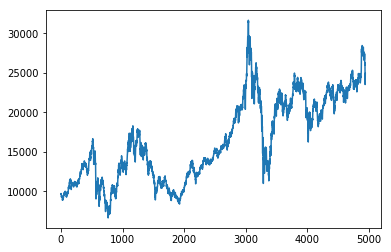

In [0]:
df['Close'].plot()

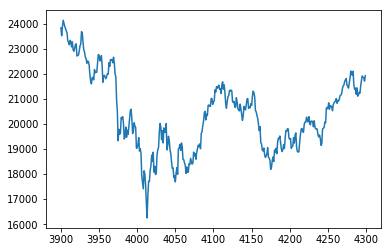

In [0]:
df['Close'][3900:4300].plot()

In [0]:
beta = np.zeros(len(df.index))
beta = beta+0.99

beta[700:1000] = 0.1
beta[1600:2000] = 0.1
beta[3200:3500] = 0.1
beta[3900:4300] = 0.1

In [0]:
df['Beta'] = beta 

In [0]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Beta
0,1995-07-11,9712.900391,9732.099609,9639.400391,9670.000000,9670.000000,0.000000e+00,0.99
1,1995-07-12,9646.299805,9699.900391,9620.000000,9639.599609,9639.599609,0.000000e+00,0.99
2,1995-07-13,9701.700195,9820.799805,9701.700195,9742.400391,9742.400391,0.000000e+00,0.99
3,1995-07-14,9735.799805,9744.900391,9692.000000,9728.000000,9728.000000,0.000000e+00,0.99
4,1995-07-17,9686.799805,9686.799805,9598.200195,9634.000000,9634.000000,0.000000e+00,0.99
5,1995-07-18,9648.900391,9679.400391,9614.599609,9617.000000,9617.000000,0.000000e+00,0.99
6,1995-07-19,9537.000000,9537.000000,9370.099609,9418.900391,9418.900391,0.000000e+00,0.99
7,1995-07-20,9359.200195,9423.200195,9240.099609,9423.200195,9423.200195,0.000000e+00,0.99
8,1995-07-21,9432.799805,9439.099609,9374.099609,9410.200195,9410.200195,0.000000e+00,0.99
9,1995-07-24,9386.900391,9386.900391,9248.400391,9288.000000,9288.000000,0.000000e+00,0.99


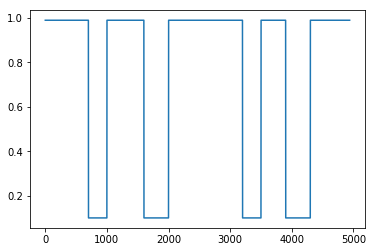

In [0]:
df['Beta'].plot()

In [0]:
df = df.drop('Open',1).drop('High',1).drop('Low',1).drop('Adj Close',1).drop('Volume',1)



In [0]:
df

,Date,Close,Beta
0,1995-07-11,9670.000000,0.99
1,1995-07-12,9639.599609,0.99
2,1995-07-13,9742.400391,0.99
3,1995-07-14,9728.000000,0.99
4,1995-07-17,9634.000000,0.99
5,1995-07-18,9617.000000,0.99
6,1995-07-19,9418.900391,0.99
7,1995-07-20,9423.200195,0.99
8,1995-07-21,9410.200195,0.99
9,1995-07-24,9288.000000,0.99


In [0]:
for i in range(0,8):
    temp_str = str('RSI '+str(7*(2**i)) )
    df[temp_str] = rsiFunc(df['Close'],7*(2**i))


In [0]:
df

,Date,Close,Beta,RSI 7,RSI 14,RSI 28,RSI 56,RSI 112,RSI 224,RSI 448,RSI 896
0,1995-07-11,9670.000000,0.99,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
1,1995-07-12,9639.599609,0.99,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
2,1995-07-13,9742.400391,0.99,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
3,1995-07-14,9728.000000,0.99,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
4,1995-07-17,9634.000000,0.99,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
5,1995-07-18,9617.000000,0.99,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
6,1995-07-19,9418.900391,0.99,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
7,1995-07-20,9423.200195,0.99,23.405626,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
8,1995-07-21,9410.200195,0.99,22.571844,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
9,1995-07-24,9288.000000,0.99,16.230937,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000


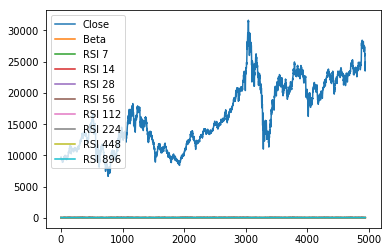

In [0]:
df.plot()

In [0]:
from numpy import *
import numpy as numpy
import scipy.special

In [0]:
class NN:
    def __init__(self, inputnodes,hiddennodes,outputnodes,learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        self.wih = numpy.random.normal(0.0, pow(self.hnodes,-0.5) , (self.hnodes,self.inodes) )
        self.who = numpy.random.normal(0.0, pow(self.onodes,-0.5) , (self.onodes,self.hnodes) )
        
        
        self.lr = learningrate
        
        self.activation_function = lambda x: scipy.special.expit(x)

        pass
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin = 2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        final_outputs = self.activation_function(final_inputs)
        
        #============================================================
        targets = numpy.array(targets_list, ndmin = 2).T
        
        output_errors = targets - final_outputs
        
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        #update W between hidden and output
        self.who += self.lr * numpy.dot(  (output_errors*final_outputs*(1.0 - final_outputs)), numpy.transpose(hidden_outputs) )
        
        #update W between input and hidden
        self.wih += self.lr * numpy.dot(  (hidden_errors*hidden_outputs*(1.0 - hidden_outputs)  ),  numpy.transpose(inputs) )
        
        pass
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin = 2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
        
        pass
    

In [0]:
nn = NN(8,1000,1,0.3)

# ============================================================
# random learn
# ==============================

In [0]:
#random learn
input_list = []
plot_list = []

output = 0
#while 1:
for kk in range(0,240000):
    i= int(np.random.rand()*len(df.index))
    input_list = []
    for j in range(0,8):
        temp_str = str('RSI '+str(7*(2**j)) )
        input_list = np.append( input_list, df[temp_str][i] /100.0 )

    
    output = df['Beta'][i]
    nn.train( input_list , output )
    
    if kk%20000 == 0:
        print(kk)
        learnt_beta = np.zeros(len(df))
        for i in range(0,len(df)):
            input_list = []
            for j in range(0,8):
                temp_str = str('RSI '+str(7*(2**j)) )
                input_list = np.append( input_list, df[temp_str][i] /100 )

            learnt_beta[i]=nn.query(input_list)


        plot_list.append( hma(learnt_beta,100)   )


0
20000
40000
60000
80000
100000
120000
140000
160000
180000
200000
220000


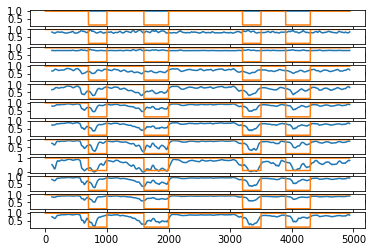

In [0]:
for i in range(0,len(plot_list) ):
    plt.subplot(len(plot_list), 1, i+1)
    plt.plot(plot_list[i])
    plt.plot(beta)

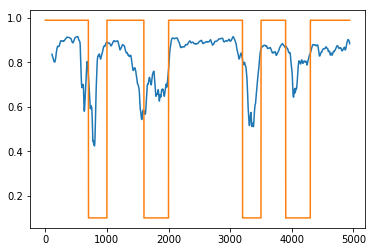

In [0]:
learnt_beta = np.zeros(len(df))
for i in range(0,len(df)):
    input_list = []
    for j in range(0,8):
        temp_str = str('RSI '+str(7*(2**j)) )
        input_list = np.append( input_list, df[temp_str][i] /100 )
    
    """
    input_list = np.append( input_list, df['BB%B 20 2'][i] /2.5 )
    input_list = np.append( input_list, df['BB%B 40 2'][i] /2.5 )
    input_list = np.append( input_list, df['BB%B 80 2'][i] /2.5 )
    input_list = np.append( input_list, df['BB%B 160 2'][i] /2.5 )
    input_list = np.append( input_list, 0.6)
    """

    learnt_beta[i]=nn.query(input_list)
    

plt.plot(hma(learnt_beta,100) )
plt.plot(beta)

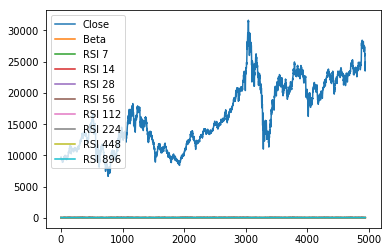

In [0]:
df.plot()

In [0]:
nn.wih  #the brain!!!!!!

array([[-1.55646238, -1.63848978, -1.65781411, ..., -1.74042442,
        -1.58139087, -1.3830642 ],
       [-2.04636615, -2.04749665, -2.03770376, ..., -1.90361473,
        -1.40410573, -1.01623817],
       [-1.63564161, -1.77573518, -1.90580943, ..., -2.21572995,
        -2.42660865, -2.49456573],
       ...,
       [-1.73378438, -1.66999413, -1.75157134, ..., -1.74198045,
        -1.44662428, -1.13528026],
       [-1.65636782, -1.77277418, -1.90096142, ..., -2.02834282,
        -2.15756775, -2.322751  ],
       [-1.56440735, -1.82899781, -2.0502101 , ..., -2.24892209,
        -2.56753335, -2.79891086]])

In [0]:
nn.who #the brain!!!!!!

array([[-5.25531134e-01, -1.02555039e-01,  5.14653680e-01,
         1.00744711e+00,  3.57956060e-01,  9.78452705e-01,
         2.55843033e-01, -9.46678154e-01,  1.49227404e+00,
         4.32141517e-01, -5.38373568e-01,  9.29155604e-01,
         7.78280718e-01, -1.23703599e-01, -3.07670366e-01,
         1.15546113e+00,  5.24968544e-01,  7.67120994e-01,
         1.54694794e-01, -5.13745601e-01,  3.74214181e+00,
        -7.73414219e-02,  8.88790680e-01,  6.70508994e-01,
         2.11655261e+00,  2.32686194e+00,  8.98584565e-01,
         6.85013589e-01,  9.32434875e-01,  7.54473082e-01,
         4.23966072e-01, -5.52651371e-02, -5.20892844e-01,
         4.48264445e-01,  2.27427449e+00, -8.83931377e-01,
         5.04455315e-01,  6.70530408e-01,  1.31859308e-01,
         4.82903876e-01, -4.44334581e-01,  2.83606300e-01,
        -6.06214093e-01,  2.44661664e+00,  1.46026683e-01,
        -2.12933909e-01,  5.20962929e-01, -2.45393672e-01,
        -3.16471178e-01,  3.25762094e-01,  7.87631707e-0

In [0]:
np.savetxt('wih_NN_RSI4_HSI.txt', nn.wih, delimiter=',')
np.savetxt('who_NN_RSI4_HSI.txt', nn.who, delimiter=',')